# QuTiP example: Energy-levels of a quantum systems as a function of a single parameter

J.R. Johansson and P.D. Nation

For more information about QuTiP see [http://qutip.org](http://qutip.org)

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt

In [4]:
import numpy as np
from numpy import pi

In [5]:
from qutip import *

## Energy spectrum of three coupled qubits

In [6]:
def compute(w1list, w2, w3, g12, g13):

    # Pre-compute operators for the hamiltonian
    sz1 = tensor(sigmaz(), qeye(2), qeye(2))
    sx1 = tensor(sigmax(), qeye(2), qeye(2))

    sz2 = tensor(qeye(2), sigmaz(), qeye(2))
    sx2 = tensor(qeye(2), sigmax(), qeye(2))

    sz3 = tensor(qeye(2), qeye(2), sigmaz())
    sx3 = tensor(qeye(2), qeye(2), sigmax())
  
    idx = 0
    evals_mat = np.zeros((len(w1list),2*2*2))
    for w1 in w1list:

        # evaluate the Hamiltonian
        H = w1 * sz1 + w2 * sz2 + w3 * sz3 + g12 * sx1 * sx2 + g13 * sx1 * sx3

        # find the energy eigenvalues of the composite system
        evals, ekets = H.eigenstates()

#        print(len(evals))
        evals_mat[idx,:] = np.real(evals)

        idx += 1

    return evals_mat

In [7]:
w1  = 1.0 * 2 * pi   # atom 1 frequency: sweep this one
w2  = 0.9 * 2 * pi   # atom 2 frequency
w3  = 1.1 * 2 * pi   # atom 3 frequency
g12 = 0.05 * 2 * pi   # atom1-atom2 coupling strength
g13 = 0.05 * 2 * pi   # atom1-atom3 coupling strength

w1list = np.linspace(0, 2.25, 100) * 2 * pi # atom 1 frequency range

In [12]:
evals_mat = compute(w1list, w2, w3, g12, g13)

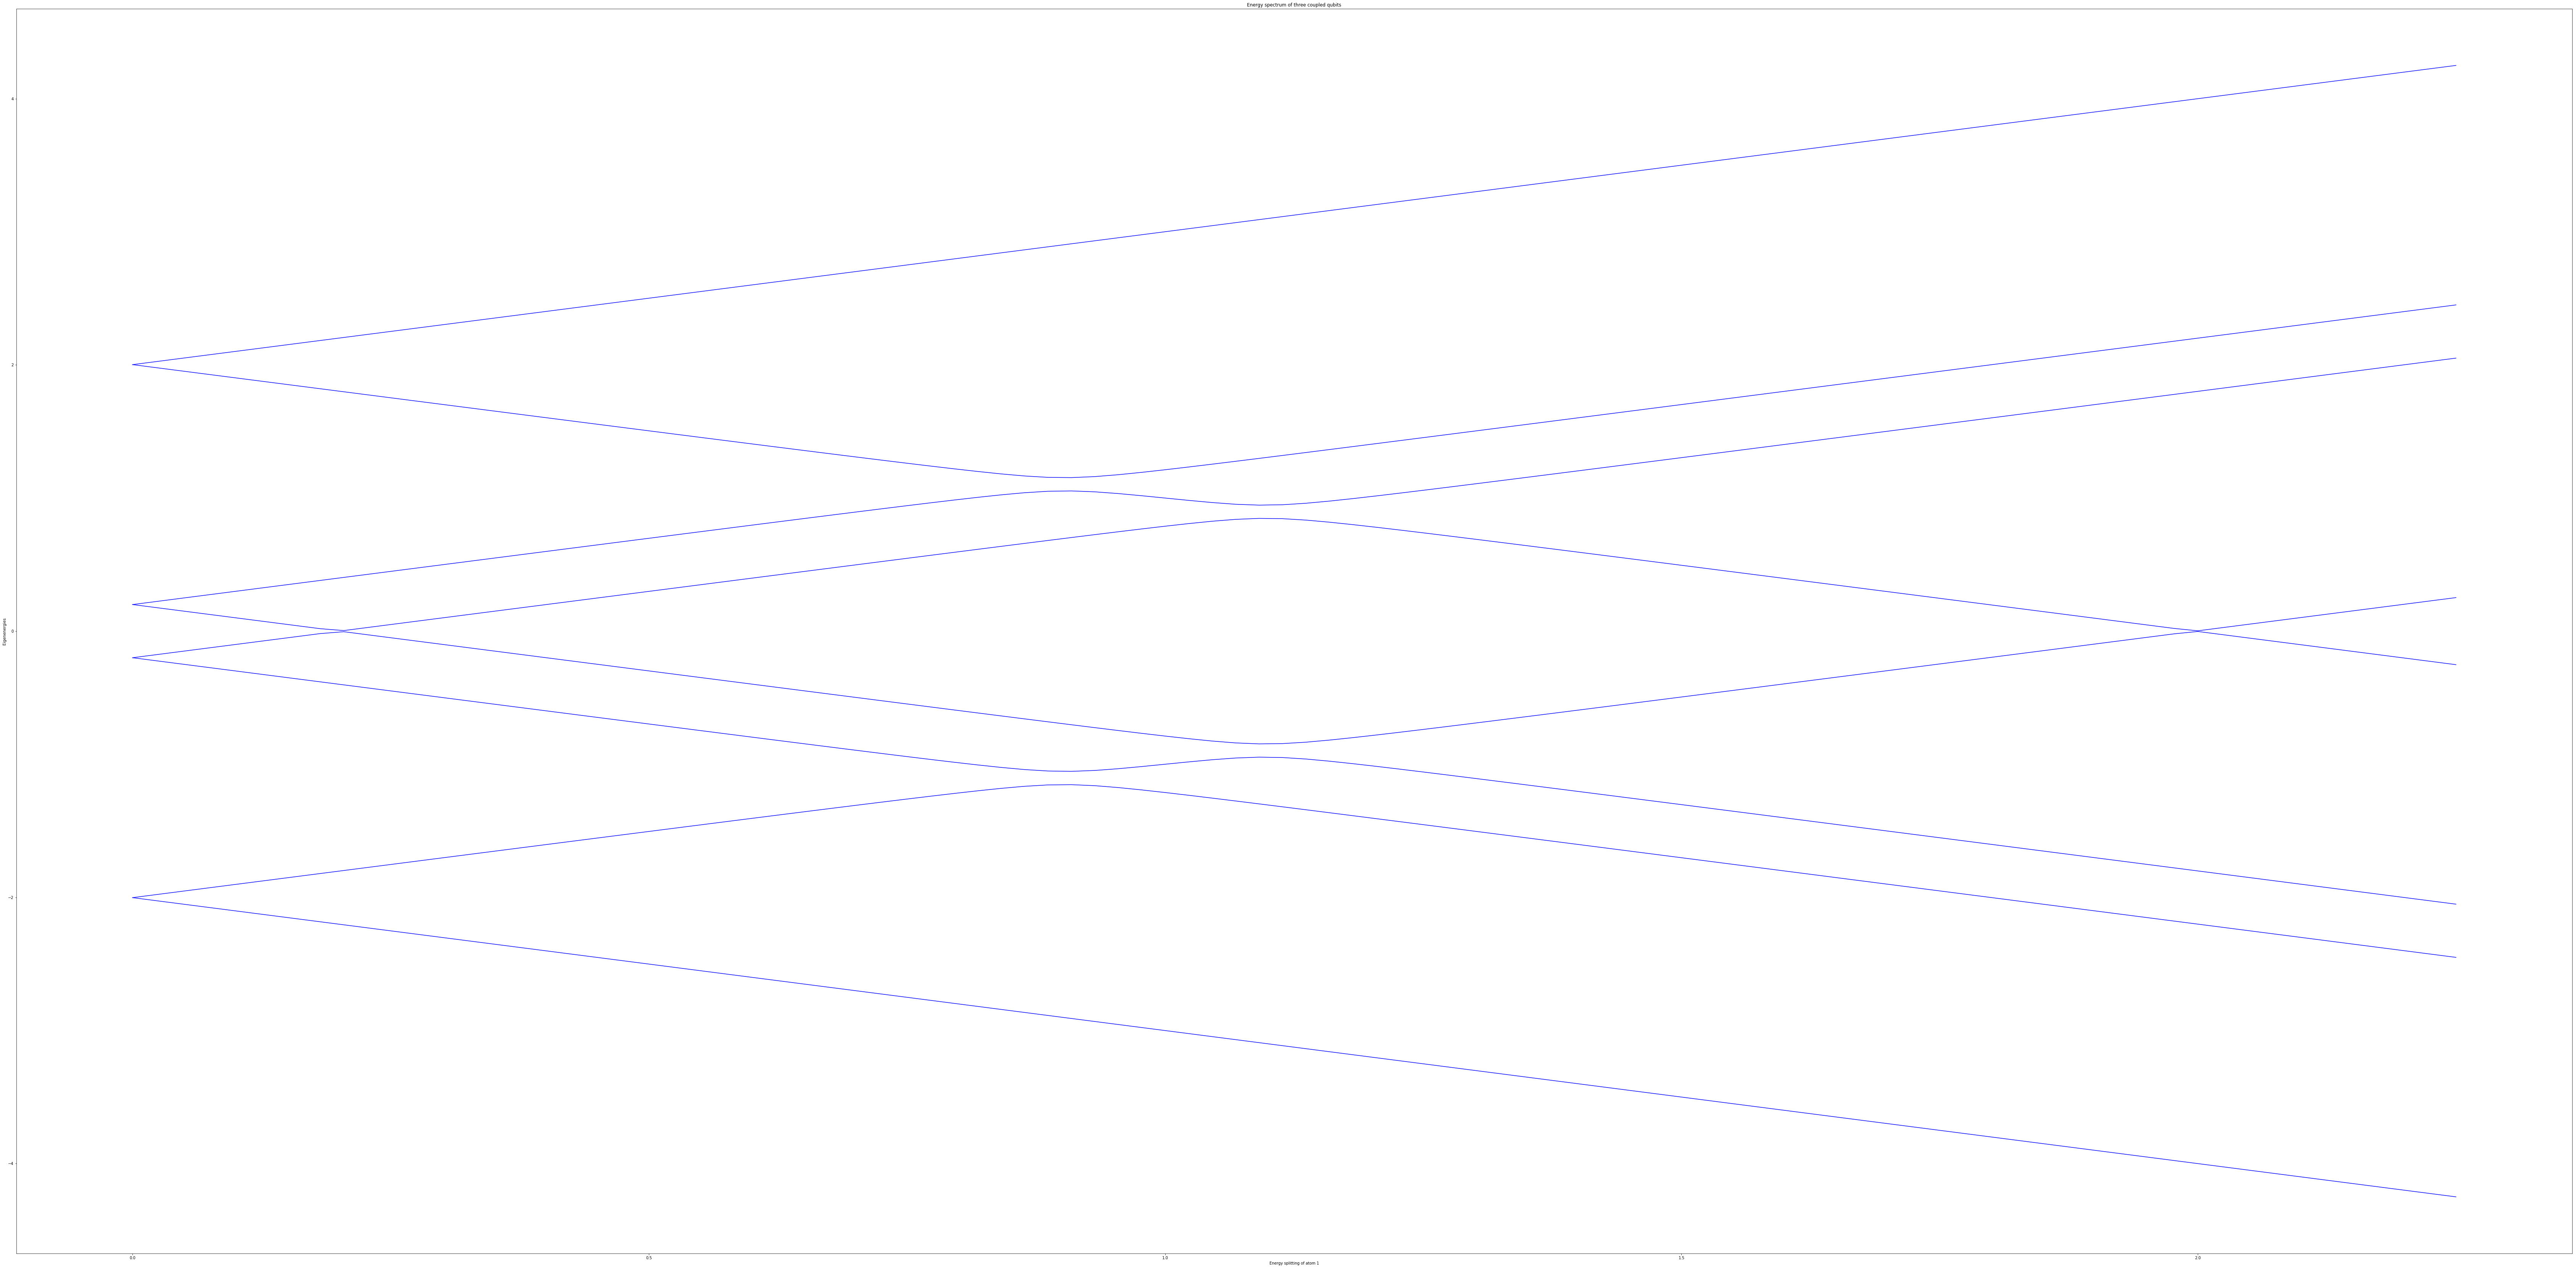

In [22]:
fig, ax = plt.subplots(figsize=(120,60))

for n in [0,1,2,3,4,5,6,7]:
    ax.plot(w1list / (2*pi), (evals_mat[:,n]) / (2*pi), 'b')

ax.set_xlabel('Energy splitting of atom 1')
ax.set_ylabel('Eigenenergies')
ax.set_title('Energy spectrum of three coupled qubits');

In [21]:
print(evals_mat[0][0]/(2*pi))
print(evals_mat[0][1]/(2*pi))

-2.002523596143258
-2.0025235961432575


## Versions

In [ ]:
from qutip.ipynbtools import version_table

version_table()